In [61]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import os
os.chdir('/Users/aarsh/Documents/Applied Machine Learning/ Sales Project/rossmann-store-sales')

In [62]:
df=pd.read_csv('store.csv')
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [63]:
df1=pd.read_csv('train.csv')
df1.head()


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [64]:
data=pd.merge(df,df1,on="Store")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [65]:
#changes withtin the data

data.loc[data.CompetitionOpenSinceMonth.isnull(),"CompetitionOpenSinceMonth"]=data["CompetitionOpenSinceMonth"].mean()
data.loc[data.CompetitionOpenSinceYear.isnull(),"CompetitionOpenSinceYear"]=data["CompetitionOpenSinceYear"].mean()
data=data[data["Open"]==1]
#adding new columns

data["Month"]=pd.to_datetime(data["Date"]).dt.month
data["Year"]=pd.to_datetime(data["Date"]).dt.year
data['SH'] = data.StateHoliday.map( {'a': 1, 'b': 2, 'c': 3, '0': 0, 0:0} ).astype('category')
data['SType'] = data.StoreType.map( {'a': 1, 'b': 2, 'c': 3, 'd': 4} ).astype(int)
data['AS'] = data.Assortment.map( {'a': 1, 'b': 2, 'c': 3, 'd': 4} ).astype(int)
data["SchHoliday"]=data["SchoolHoliday"].astype('category')

data=data.fillna(0)
data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,SH,SType,AS,SchHoliday
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,...,1,1,0,1,7,2015,0,3,1,1
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,...,1,1,0,1,7,2015,0,3,1,1
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,...,1,1,0,1,7,2015,0,3,1,1
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,...,1,1,0,1,7,2015,0,3,1,1
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,...,1,1,0,1,7,2015,0,3,1,1


In [66]:
#checking for duplicates
duplicates=data.duplicated()
if duplicates[1]==True:
    print(duplicates)

In [67]:
#Duration of dataset
def duration(data):
    data.Date=pd.to_datetime(data.Date)
    number_of_days=data.Date.max()-data.Date.min()
    number_of_years=number_of_days.days/365
    print(number_of_days.days,'days')
    print(number_of_years,'years')
duration(data)

941 days
2.578082191780822 years


In [68]:
def monthly_sales(data):
    monthly_data = data.copy()
    monthly_data.Date = monthly_data.Date.apply(lambda x: str(x)[:-3])
    monthly_data = monthly_data.groupby('Date')['Sales'].sum().reset_index()
    monthly_data.Date = pd.to_datetime(monthly_data.Date)
    return monthly_data

In [69]:
month_df=monthly_sales(data)
month_df.head()


,Date,Sales
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593


In [70]:
#overall average monthly sales
avg_month_sale=month_df.Sales.mean()
print(f"Overall average monthly sales: ${avg_month_sale}")

Overall average monthly sales: $6234798.962845011


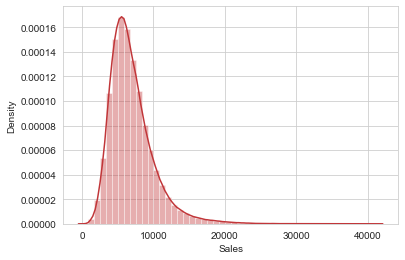

In [73]:
#checking distribution of sales
g=sns.distplot(data.Sales[data.Sales>0],hist=True)
g.set(ylabel="Density")
plt.show()

By looking at the above graph we can see that the distribution of sales  is a bit right-skewed.

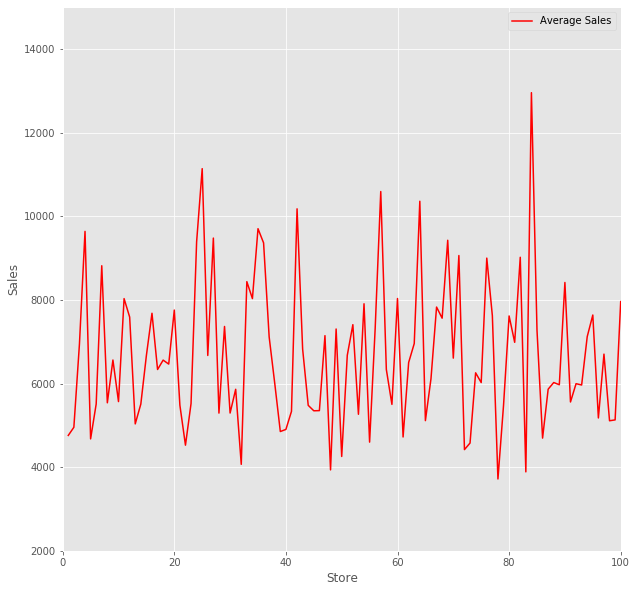

In [11]:
plt.style.use("ggplot")
plt.figure(figsize=[10,10])
data.groupby("Store")["Sales"].mean().plot(xlim=(0,100),ylim=(2000,15000),legend=True,label="Average Sales",color='red')
plt.ylabel("Sales")
plt.show()

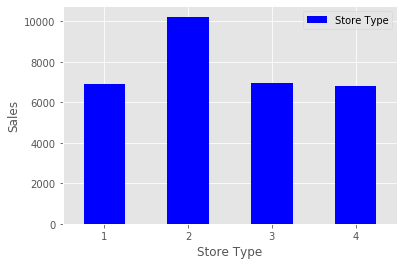

In [12]:
data.groupby("SType")["Sales"].mean().plot(kind='bar',color='blue',label="Store Type",legend=True,rot=360) 
plt.xlabel("Store Type")
plt.ylabel("Sales")
plt.show()

The above graph shows that for store type 2 sales are a bit towards the higher side

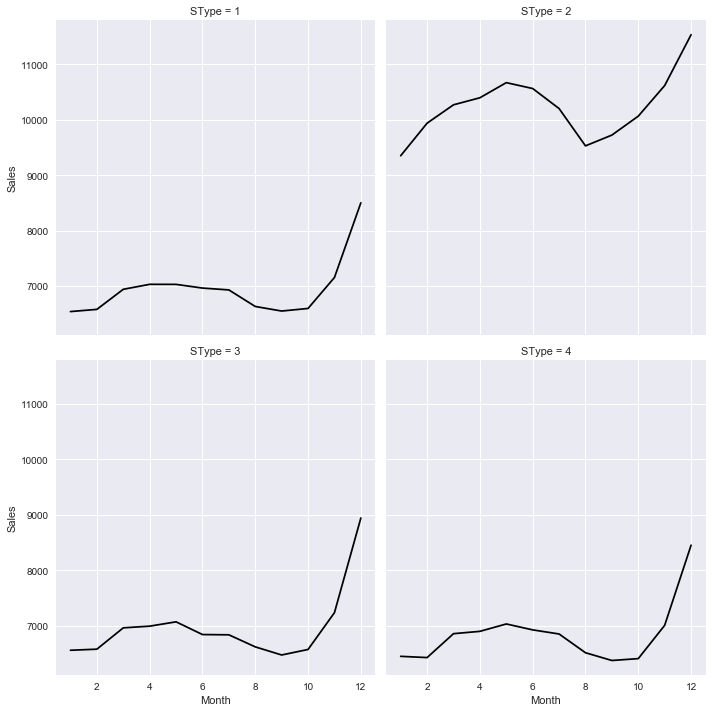

In [13]:
#using relplot i could use subplots
plt.style.use("seaborn")
Avg_sales=data.groupby(["Month","SType"])["Sales"].mean().reset_index()
sns.relplot(x="Month",y="Sales",data=Avg_sales,kind="line",col="SType",col_wrap=2,color='black')
plt.show()

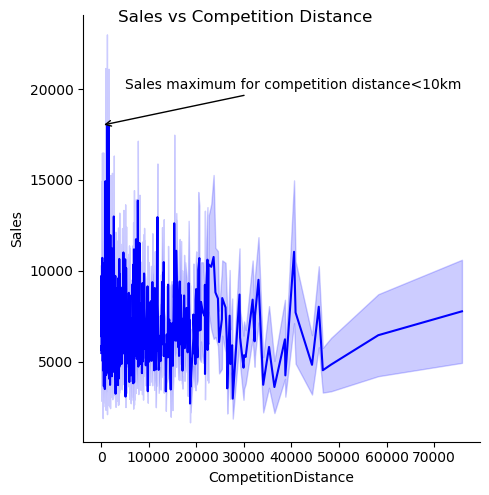

In [14]:
#here we have multiple observations per competition distance so this will display the mean of these values
#the CI shows that we can 95%confident that the average sales is within this range
#the ci parameter shows the spread of the observation for each x value(sd=standard deviation
plt.style.use("default")
g=sns.relplot(x="CompetitionDistance",y="Sales",kind="line",data=data,color='blue',ci="sd")
g.fig.suptitle("Sales vs Competition Distance")
plt.annotate(s="Sales maximum for competition distance<10km",xy=[0,18000],xytext=[5000,20000]
             ,arrowprops={"arrowstyle":'->'})
plt.show()

Here we have multiple observations per competition distance so the above graph displays the mean of these values.The Confidence-interval(grey portion) shows that we can 95%confident that the average sales are within this range and the ci parameter shows the spread of the observation for each x value(sd=standard deviation)


In [15]:
data.PromoInterval.value_counts()

0                   423307
Jan,Apr,Jul,Oct     242411
Feb,May,Aug,Nov      98005
Mar,Jun,Sept,Dec     80669
Name: PromoInterval, dtype: int64

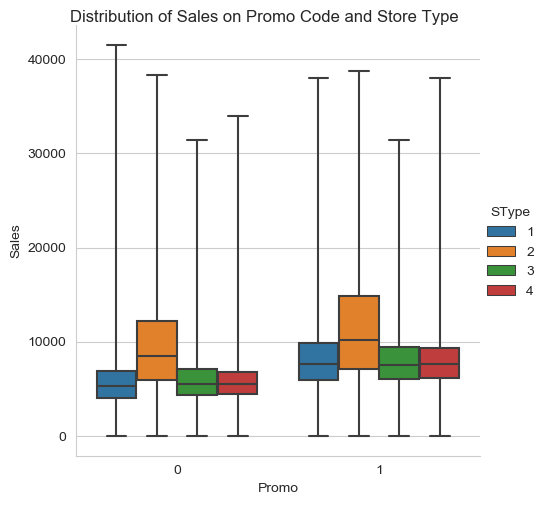

In [16]:
sns.set_style("whitegrid")
g=sns.catplot(x="Promo",y="Sales",kind="box",hue="SType",data=data,whis=[0,100])
g.fig.suptitle("Distribution of Sales on Promo Code and Store Type",y=1)
plt.show()

The above boxplot shows the average sales of all types of stores when promo is applied,the whiskers are set to the min-max value

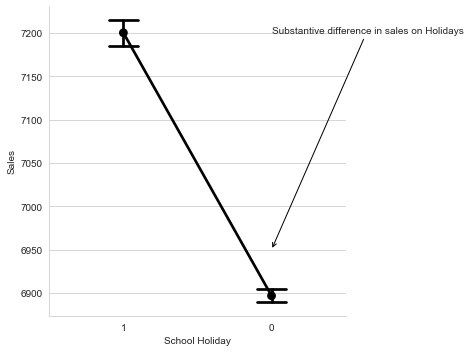

In [74]:
g=sns.catplot(x="SchHoliday",y="Sales",kind="point",capsize=0.2,data=data,order=[1,0],color="black")
g.set(xlabel="School Holiday")
plt.annotate(s="Substantive difference in sales on Holidays",xy=[1,6950],xytext=[1,7200]
             ,arrowprops={"arrowstyle":'->',"color":"black"})
plt.show()

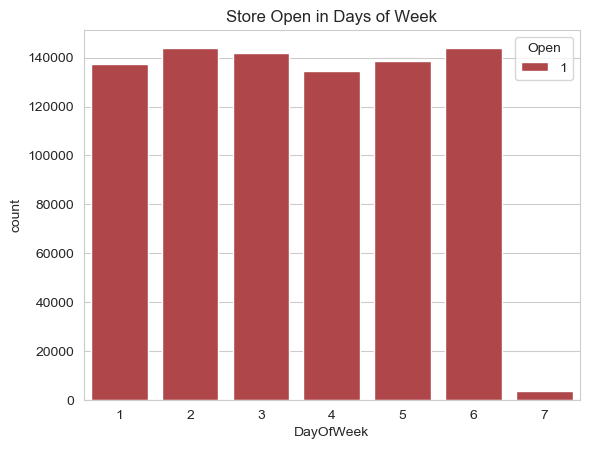

In [18]:
sns.set_palette("RdBu")
sns.countplot(x = 'DayOfWeek', hue = 'Open', data = data)
plt.title('Store Open in Days of Week')
plt.show()

We can see that stores work on a 6 day basis

In [75]:
data.groupby('DayOfWeek')['Sales'].mean()
#average sales everyday


DayOfWeek
1    8216.073074
2    7088.113656
3    6728.122978
4    6767.310159
5    7072.677012
6    5874.840238
7    8224.723908
Name: Sales, dtype: float64

One interesting insight to note from the above analysis is that not all stores are open on the 7th day but w=those which are open are producing a pretty good output

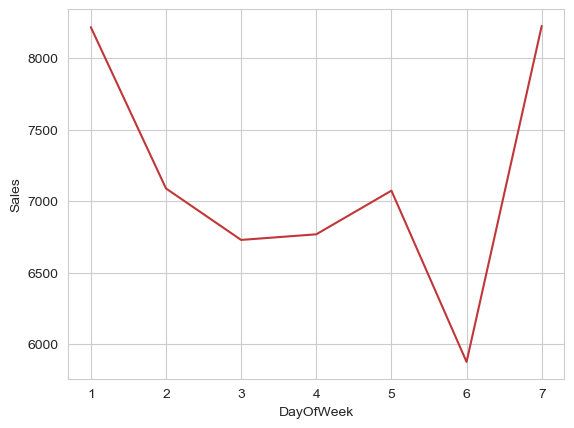

In [20]:
data.groupby('DayOfWeek')['Sales'].mean().plot(kind="line").set_ylabel("Sales")
plt.show()
Here we see that although very few stores are open on sundays but the sale peaks on that day.

Here we see that although very few stores are open on sundays but the sale peaks on that day.

In [21]:
dk=data[data["SH"]==3]
k=dk["Store"].unique()
dm=data[data["SH"]==2]
n=dm["Store"].unique()
dl=data[data["SH"]==1]
m=dl["Store"].unique()

from functools import reduce
StoreOpenHoliday=reduce(np.intersect1d,(k,n,m))
print(StoreOpenHoliday)


[  85  259  262  274  299  335  353  423  494  512  530  562  676  682
  733  769  948 1081 1097 1099]


 These ^ are the particular stores always open on all state holidays

In [22]:
data.groupby("Year")["Sales"].mean()

Year
2013    6814.392025
2014    7025.404201
2015    7088.126648
Name: Sales, dtype: float64

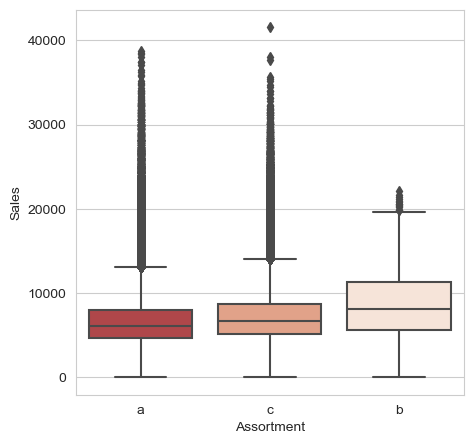

In [23]:
plt.figure(figsize=[5,5])
sns.boxplot(x="Assortment",y="Sales",data=data)
plt.show()

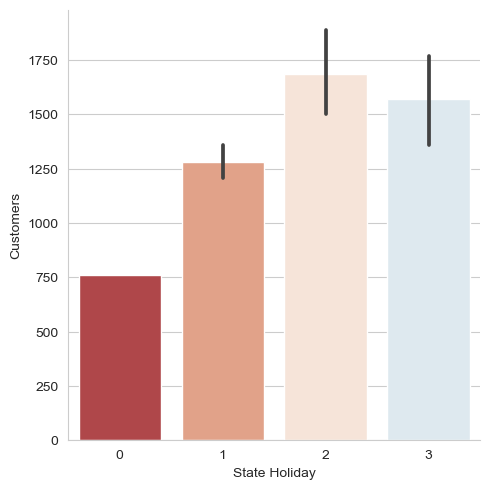

In [24]:
g=sns.catplot(x="SH",y="Customers",kind="bar",data=data)
g.set(xlabel="State Holiday")
plt.show()

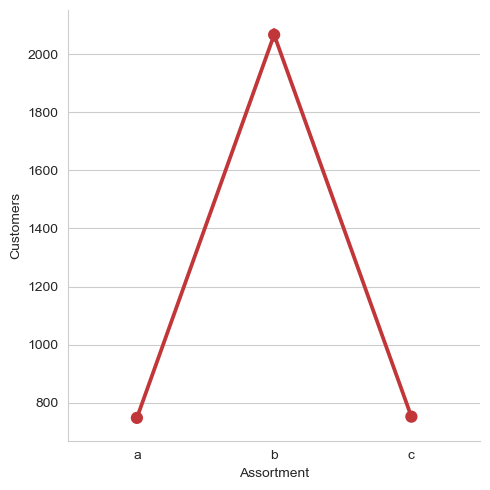

In [25]:
sns.catplot(x="Assortment",y="Customers",data=data,kind="point",order=['a','b','c'])
plt.show()

In [26]:
data.groupby("Assortment")["Sales"].mean()

Assortment
a    6621.017039
b    8639.346322
c    7300.526339
Name: Sales, dtype: float64